# Proyek Analisis Data: [E-Comerce Public Dataset]
- **Nama:** Rizki Jundika
- **Email:** rizkijundika2019@gmail.com
- **ID Dicoding:** rizkijundika

## Menentukan Pertanyaan Bisnis

1. Produk apa yang terjual banyak tiap tahunnya?
2. Negara apa dengan penjualan terbanyak dan sedikit?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.head()

geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
geolocation_df.head()

order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_items_df.head()

order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")
order_payments_df.head()

order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
order_reviews_df.head()

orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.head()

sellers_df = pd.read_csv("./data/sellers_dataset.csv")
sellers_df.head()

product_category_name_translation_df = pd.read_csv("./data/product_category_name_translation.csv")
product_category_name_translation_df.head()

products_df = pd.read_csv("./data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
The code loads multiple CSV files related to an e-commerce dataset, including customer information, geographical data, order details, payment information, customer reviews, seller information, product categories, and product details. This setup allows for comprehensive analysis of different aspects of the e-commerce operation, such as customer behavior, sales performance, geographical insights, and product popularity.

### Assessing Data

In [3]:
def check_data(df, name):
    print(f"--- {name} ---")
    print(df.head())
    print(df.info())

    print("\nMissing values:")
    print(df.isna().sum())

    print(f"\nDuplicate values: {df.duplicated().sum()}")
    print("\n" + "-"*50 + "\n")

customers_df = pd.read_csv("./data/customers_dataset.csv")
check_data(customers_df, "Customer Data")

geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
check_data(geolocation_df, "Geolocation Data")

order_items_df = pd.read_csv("./data/order_items_dataset.csv")
check_data(order_items_df, "Order Items Data")

order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")
check_data(order_payments_df, "Order Payments Data")

order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
check_data(order_reviews_df, "Order Reviews Data")

orders_df = pd.read_csv("./data/orders_dataset.csv")
check_data(orders_df, "Orders Data")

sellers_df = pd.read_csv("./data/sellers_dataset.csv")
check_data(sellers_df, "Sellers Data")

product_category_name_translation_df = pd.read_csv("./data/product_category_name_translation.csv")
check_data(product_category_name_translation_df, "Product Category Name Translation Data")

products_df = pd.read_csv("./data/products_dataset.csv")
check_data(products_df, "Products Data")

--- Customer Data ---
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column            

**Insight:** The function `check_data()` is used to perform an initial data quality assessment for each dataset. It prints the first few rows, provides information about the columns (data types, non-null values), checks for missing values, and identifies duplicate records. This helps in understanding the structure of the data, identifying any data quality issues, and determining the necessary data cleaning steps before further analysis.

### Cleaning Data

In [4]:
def clean_data(df, remove_duplicates=False, remove_na=False, datetime_columns=None):
    if remove_duplicates:
        df.drop_duplicates(inplace=True)

    if remove_na:
        df.dropna(inplace=True)

    if datetime_columns:
        df[datetime_columns] = df[datetime_columns].apply(pd.to_datetime)

    return df

customers_df = pd.read_csv("./data/customers_dataset.csv")

geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
geolocation_df = clean_data(geolocation_df, remove_duplicates=True)

order_items_df = pd.read_csv("./data/order_items_dataset.csv")

order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")

order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")

orders_df = pd.read_csv("./data/orders_dataset.csv")
datetime_columns = [
    "order_purchase_timestamp", "order_approved_at",
    "order_delivered_carrier_date", "order_delivered_customer_date",
    "order_estimated_delivery_date"
]
orders_df = clean_data(orders_df, datetime_columns=datetime_columns)

sellers_df = pd.read_csv("./data/sellers_dataset.csv")

product_category_name_translation_df = pd.read_csv("./data/product_category_name_translation.csv")

products_df = pd.read_csv("./data/products_dataset.csv")
products_df = clean_data(products_df, remove_na=True)

**Insight:**

The `clean_data()` function is used to clean the datasets by removing duplicates, handling missing values, and converting specified columns to datetime format. This helps ensure the datasets are free from redundant or missing data and have correct data types, which is crucial for accurate analysis.

## Exploratory Data Analysis (EDA)

### Explore ...

Top Products Sold Each Year:
     year       product_category  total_sales  total_revenue
18   2016        furniture_decor           69        5880.78
20   2016          health_beauty           51        4687.48
25   2016              perfumery           33        5688.70
29   2016                   toys           27        4465.09
7    2016  computers_accessories           21        1399.32
38   2017         bed_bath_table         5223      498440.43
70   2017        furniture_decor         4147      337213.12
96   2017         sports_leisure         4095      452148.84
74   2017          health_beauty         3668      481755.71
46   2017  computers_accessories         3098      405078.69
145  2018          health_beauty         5951      772238.15
109  2018         bed_bath_table         5884      538069.26
117  2018  computers_accessories         4708      505476.31
166  2018         sports_leisure         4527      532566.49
141  2018        furniture_decor         4118      38666

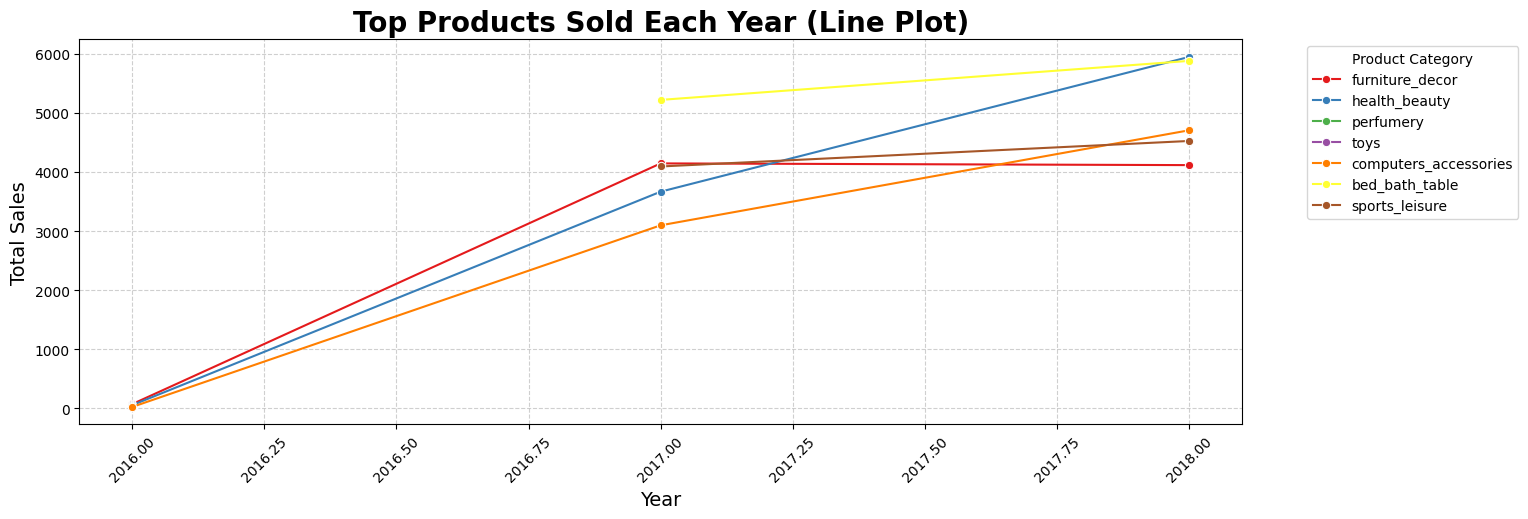

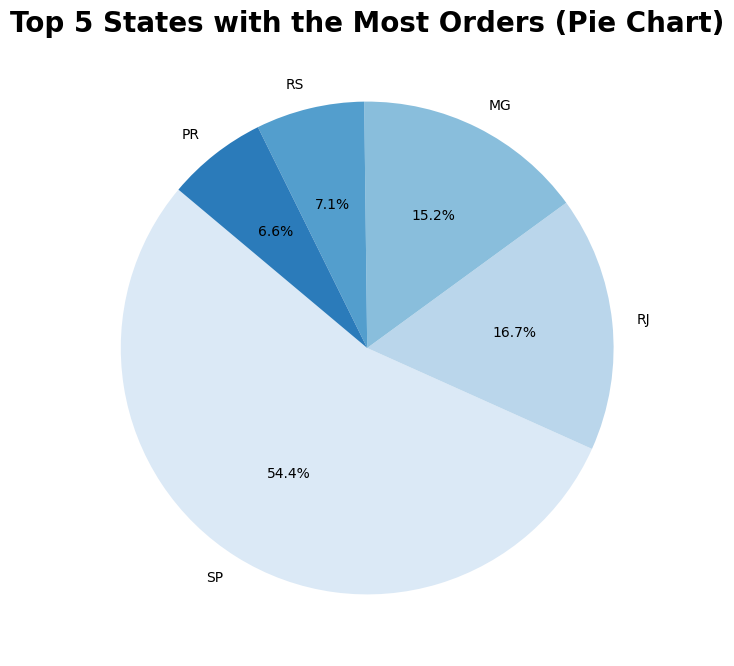

C:\Users\ALEXIS\AppData\Local\Temp\ipykernel_26548\2712416458.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_5_states, y='customer_state', x='total_orders', palette='magma')


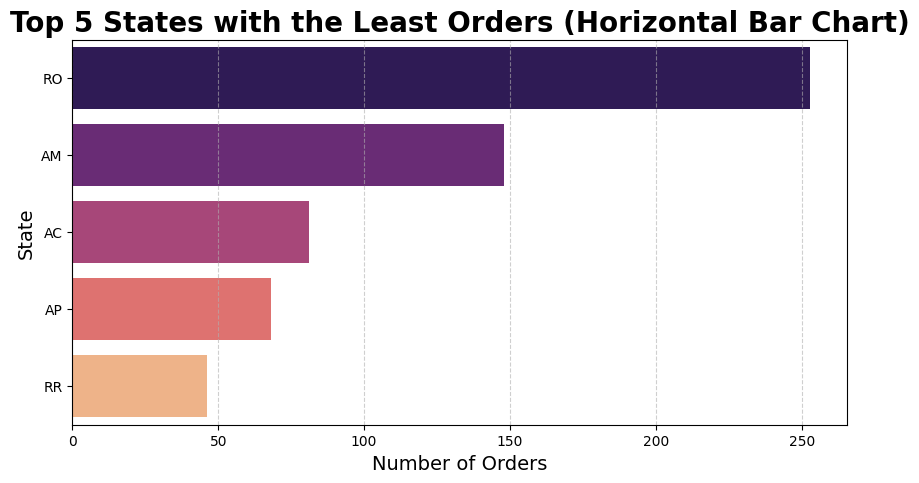

Main dataset berhasil diekspor ke './dashboard/main_data.csv'


In [5]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
orders_df = pd.read_csv("./data/orders_dataset.csv")
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
products_df = pd.read_csv("./data/products_dataset.csv")
product_category_name_translation = pd.read_csv("./data/product_category_name_translation.csv")

datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column], errors='coerce')

products_df = pd.merge(
    left=products_df,
    right=product_category_name_translation,
    how="left",
    on="product_category_name",
)

order_items_with_product_data_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    on="product_id"
)

orders_df['order_year'] = orders_df['order_purchase_timestamp'].dt.year

order_items_with_orders_df = pd.merge(
    left=order_items_with_product_data_df,
    right=orders_df[['order_id', 'order_year']],
    how="left",
    on="order_id"
)

yearly_product_sales_summary_df = order_items_with_orders_df.groupby(['order_year', 'product_category_name_english']).agg({
    'order_item_id': 'count',
    'price': 'sum'
}).reset_index()

yearly_product_sales_summary_df.columns = ['year', 'product_category', 'total_sales', 'total_revenue']
yearly_product_sales_summary_df = yearly_product_sales_summary_df.sort_values(by=['year', 'total_sales'], ascending=[True, False])
top_products_each_year = yearly_product_sales_summary_df.groupby('year').head(5)
print("Top Products Sold Each Year:")
print(top_products_each_year)

orders_with_customer_state_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    on="customer_id"
)

state_sales_summary_df = orders_with_customer_state_df.groupby('customer_state').agg({
    'order_id': 'count'
}).reset_index()

state_sales_summary_df.columns = ['customer_state', 'total_orders']
state_sales_summary_df = state_sales_summary_df.sort_values(by='total_orders', ascending=False)

print("\nStates with the Most Orders:")
print(state_sales_summary_df.head(5))

print("\nStates with the Least Orders:")
print(state_sales_summary_df.tail(5))

import matplotlib.pyplot as plt
import seaborn as sns

# Plot Top Products Sold Each Year with a different type of chart (line plot)
plt.figure(figsize=(15, 5))
sns.lineplot(data=top_products_each_year, x='year', y='total_sales', hue='product_category', marker='o', palette='Set1')
plt.title("Top Products Sold Each Year (Line Plot)", fontsize=20, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot States with the Most Orders using a pie chart
top_5_states = state_sales_summary_df.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_5_states['total_orders'], labels=top_5_states['customer_state'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues'))
plt.title("Top 5 States with the Most Orders (Pie Chart)", fontsize=20, fontweight='bold')
plt.show()

# Plot States with the Least Orders using a horizontal bar chart
bottom_5_states = state_sales_summary_df.tail(5)
plt.figure(figsize=(10, 5))
sns.barplot(data=bottom_5_states, y='customer_state', x='total_orders', palette='magma')
plt.title("Top 5 States with the Least Orders (Horizontal Bar Chart)", fontsize=20, fontweight='bold')
plt.xlabel("Number of Orders", fontsize=14)
plt.ylabel("State", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

main_data_df = pd.merge(
    left=order_items_with_product_data_df,
    right=orders_with_customer_state_df,
    how="left",
    on="order_id"
)

main_data_df.to_csv("./dashboard/main_data.csv", index=False)
print("Main dataset berhasil diekspor ke './dashboard/main_data.csv'")

**Insight:**
The code merges various e-commerce datasets to analyze yearly product sales and state-wise orders. It then visualizes the top products sold each year, the top 5 states with the most orders, and the bottom 5 states with the least orders using different plot types. Finally, the combined dataset is saved for future use.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

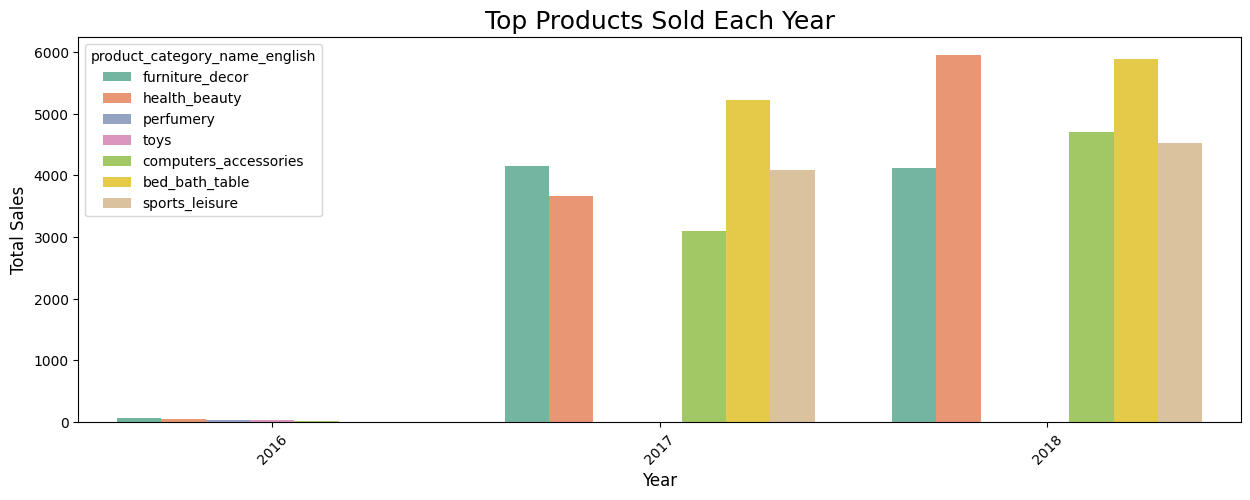

In [6]:
main_data_df = pd.read_csv("./dashboard/main_data.csv")
main_data_df['order_purchase_timestamp'] = pd.to_datetime(main_data_df['order_purchase_timestamp'], errors='coerce')
main_data_df['order_year'] = main_data_df['order_purchase_timestamp'].dt.year

yearly_sales_summary = main_data_df.groupby(['order_year', 'product_category_name_english']).agg(
    total_sales=('order_item_id', 'count'),
    total_revenue=('price', 'sum')
).reset_index()

yearly_sales_summary = yearly_sales_summary.sort_values(by=['order_year', 'total_sales'], ascending=[True, False])

top_products_per_year = yearly_sales_summary.groupby('order_year').head(5)

plt.figure(figsize=(15, 5))
sns.barplot(data=top_products_per_year, x='order_year', y='total_sales', hue='product_category_name_english', palette='Set2')
plt.title("Top Products Sold Each Year", fontsize=18)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

C:\Users\ALEXIS\AppData\Local\Temp\ipykernel_26548\3697836841.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_states, y='customer_state', x='total_orders', palette='viridis', legend=False)


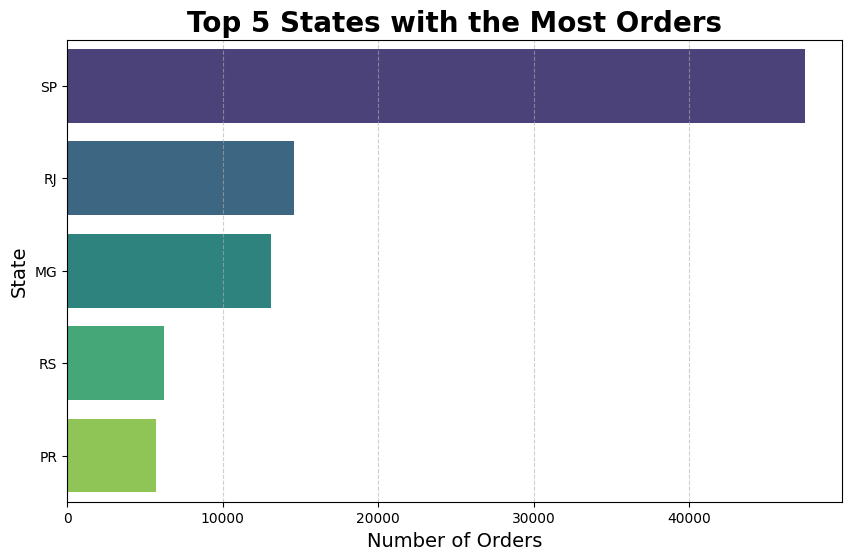

C:\Users\ALEXIS\AppData\Local\Temp\ipykernel_26548\3697836841.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_5_states, y='customer_state', x='total_orders', palette='magma', legend=False)


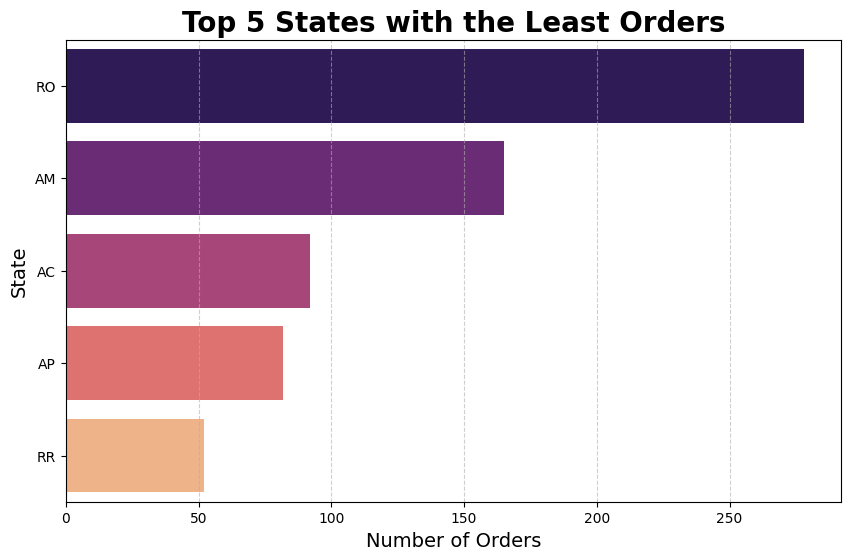

In [8]:
main_data_df = pd.read_csv("./dashboard/main_data.csv")
main_data_df['order_purchase_timestamp'] = pd.to_datetime(main_data_df['order_purchase_timestamp'], errors='coerce')

if 'customer_state' not in main_data_df.columns:
    possible_matches = main_data_df.columns[main_data_df.columns.str.contains('state', case=False)]
    print(f"Column 'customer_state' not found. Did you mean one of these?\n{possible_matches}")
else:
    sales_by_state = main_data_df.groupby('customer_state').agg(
        total_orders=('order_id', 'count'),
        total_price=('price', 'sum'),
        total_freight=('freight_value', 'sum')
    ).reset_index()

    sales_by_state['total_revenue'] = sales_by_state['total_price'] + sales_by_state['total_freight']
    sales_by_state = sales_by_state.sort_values(by='total_orders', ascending=False)


    top_5_states = sales_by_state.head(5)
    bottom_5_states = sales_by_state.tail(5)

    # Plot top 5 states with the most orders
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_5_states, y='customer_state', x='total_orders', palette='viridis', legend=False)
    plt.title("Top 5 States with the Most Orders", fontsize=20, fontweight='bold')
    plt.xlabel("Number of Orders", fontsize=14)
    plt.ylabel("State", fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

    # Plot bottom 5 states with the least orders
    plt.figure(figsize=(10, 6))
    sns.barplot(data=bottom_5_states, y='customer_state', x='total_orders', palette='magma', legend=False)
    plt.title("Top 5 States with the Least Orders", fontsize=20, fontweight='bold')
    plt.xlabel("Number of Orders", fontsize=14)
    plt.ylabel("State", fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

**Insight:**
1. Question number 1 :
The code analyzes yearly product sales, summarizing the top products by sales and revenue for each year. It visualizes the top 5 products sold each year using a bar plot, providing insights into which product categories performed best over time.

2. Question number 2 : The code analyzes sales data by state, calculating total orders, total price, and freight value for each state. It identifies the top 5 and bottom 5 states by order count and visualizes them using bar plots, providing insights into regional sales performance.

## Conclusion

### Conclusions Based on Graphs for Questions 1 & 2:

**Question 1: Which Products Were Sold the Most Each Year?**

- **Graph: Top Products Sold Each Year**
  - In 2017 and 2018, product categories like "furniture_decor," "health_beauty," and "bed_bath_table" stood out as the most sold products, indicating increasing demand for home and beauty products during these years.
  - Sales in 2016 were significantly lower compared to the following years, which could suggest that the platform or market was still in its early stages of growth at that time.

**Question 2: Which States Had the Most and Least Sales?**

- **Graph: Top 5 States with the Most Orders**
  - The state of SP had significantly more orders than other states, indicating that SP is the largest market for these e-commerce products.
  - RJ and MG also showed notable sales activity, though significantly below SP, while RS and PR had fewer orders compared to the top three.

- **Graph: Top 5 States with the Least Orders**
  - States such as RO, AM, AC, AP, and RR had the fewest orders. This indicates an opportunity to explore and increase sales in these regions, possibly through marketing efforts or improving product accessibility.

In [9]:
pip install pipreqsnb

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/798.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/798.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/798.3 kB ? eta -:--:--
   ------------- -------------------------- 262.1/798.3 kB ? eta -:--:--
   ------------- -------------------------- 262.1/798.3 kB ? eta -:--:--
   ------------- -------------------------- 262.1/798.3 kB ? eta -:--:--
   ------------------------ ------------- 524.3/798.3 kB 558.9 kB/s eta 0:00:01
   ------------------------ ------------- 524.3/798.3 kB 558.9 kB/s eta 0:00:01
   ------------------------ ------------- 524.3/798.3 kB 558.9 kB/s eta 0:00:01
   -------------------------------------- 798.3/798.3 kB 463.8 kB/s eta 0:00:00
  Created wheel for pipreqsnb: filename=pipr

In [13]:
!pipreqsnb /dashboard/dashboard.py

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\ALEXIS\AppData\Local\Programs\Python\Python312\Scripts\pipreqsnb.exe\__main__.py", line 7, in <module>
  File "C:\Users\ALEXIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pipreqsnb\pipreqsnb.py", line 98, in main
    is_file, is_nb = path_is_file(input_path)
                     ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ALEXIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pipreqsnb\pipreqsnb.py", line 80, in path_is_file
    raise Exception('{} if an invalid path'.format(path))
Exception: /dashboard/dashboard.py if an invalid path
